# Plot figures for paper2

2025.3.4

Mu-Ting Chien

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import os 
import cmaps
import sys
sys.path.append('/barnes-engr-scratch1/mchien/Function/')
import atmosphere_general as ATM
import cartopy.util as cartopy_util
import cartopy.crs as ccrs

In [95]:
DIR                    = '/barnes-engr-scratch1/c832572266/'
file_dir_obs_ace2      = DIR + 'data_output/ace2/obs_compare_with_ace2/'
file_dir_ace2          = DIR + 'data_output/ace2/ace2_output/10yr/'
file_dir_ace2_100yr    = DIR + 'data_output/ace2/ace2_output/repeat_2001-2010/'
expname_list           = list(['ace2','era5'])
fig_dir                = DIR + 'figure/paper2_fig/'
os.makedirs(fig_dir, exist_ok=True)
sub_dir = list(['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010'])
nsub    = np.size(sub_dir)

# Plot Fig. 3: TCGI lag regression (old)

In [ ]:
# Plot lag regression (start here!)


for iv in range(0, np.size(vname_list)):

    KW_composite_ace2 = globals()['KW_composite_ace2_'+vname_list[iv]+'_daily']
    KW_composite_era5 = globals()['KW_composite_era5_'+vname_list[iv]+'_daily']

    lags_tmp = lags_daily

    fig_name = 'KW_lag_regression_'+vname_list[iv]+'_2p5deg_basin_summer_only.png'
    fig = plt.subplots(2,3,figsize=(6.5, 4),dpi=600)
    plt.subplots_adjust(left=0.2,right=0.99,top=0.88,bottom=0.2, wspace=0.3, hspace=0.6)
    plt.rcParams.update({'font.size': 6})
    for ibasin in range(0, nbasin):
        plt.subplot(2, 3, ibasin+1)
        KW_composite_ace2_ano = KW_composite_ace2[:,ibasin] - np.nanmean(KW_composite_ace2[:,ibasin])
        KW_composite_era5_ano = KW_composite_era5[:,ibasin] - np.nanmean(KW_composite_era5[:,ibasin]) 
        zero = np.zeros([np.size(lags_tmp)])
        plt.plot(lags_tmp, KW_composite_ace2_ano, 'b-o',markersize=2)
        plt.plot(lags_tmp, KW_composite_era5_ano, 'k-o',markersize=2)
        if ibasin == 0:
            plt.legend(['ACE2-ERA5','IMERG'])
        plt.plot(lags_tmp,zero,'k--')
        plt.xlim([-3, 3])
        plt.xticks(np.arange(-3,4), fontsize=5)
        plt.xlabel('Lag days from KW peak (days)')
        if ibasin == 0 or ibasin == 3:
            plt.ylabel(vname_list[iv]+' ('+unit_list[iv]+')')
        plt.title(basin_list[ibasin])
        if ibasin == 1:
            plt.suptitle('KW lag-regression '+vname_list[iv]+' (20S-20N)')
        
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()
    plt.close()

# Plot individual variable

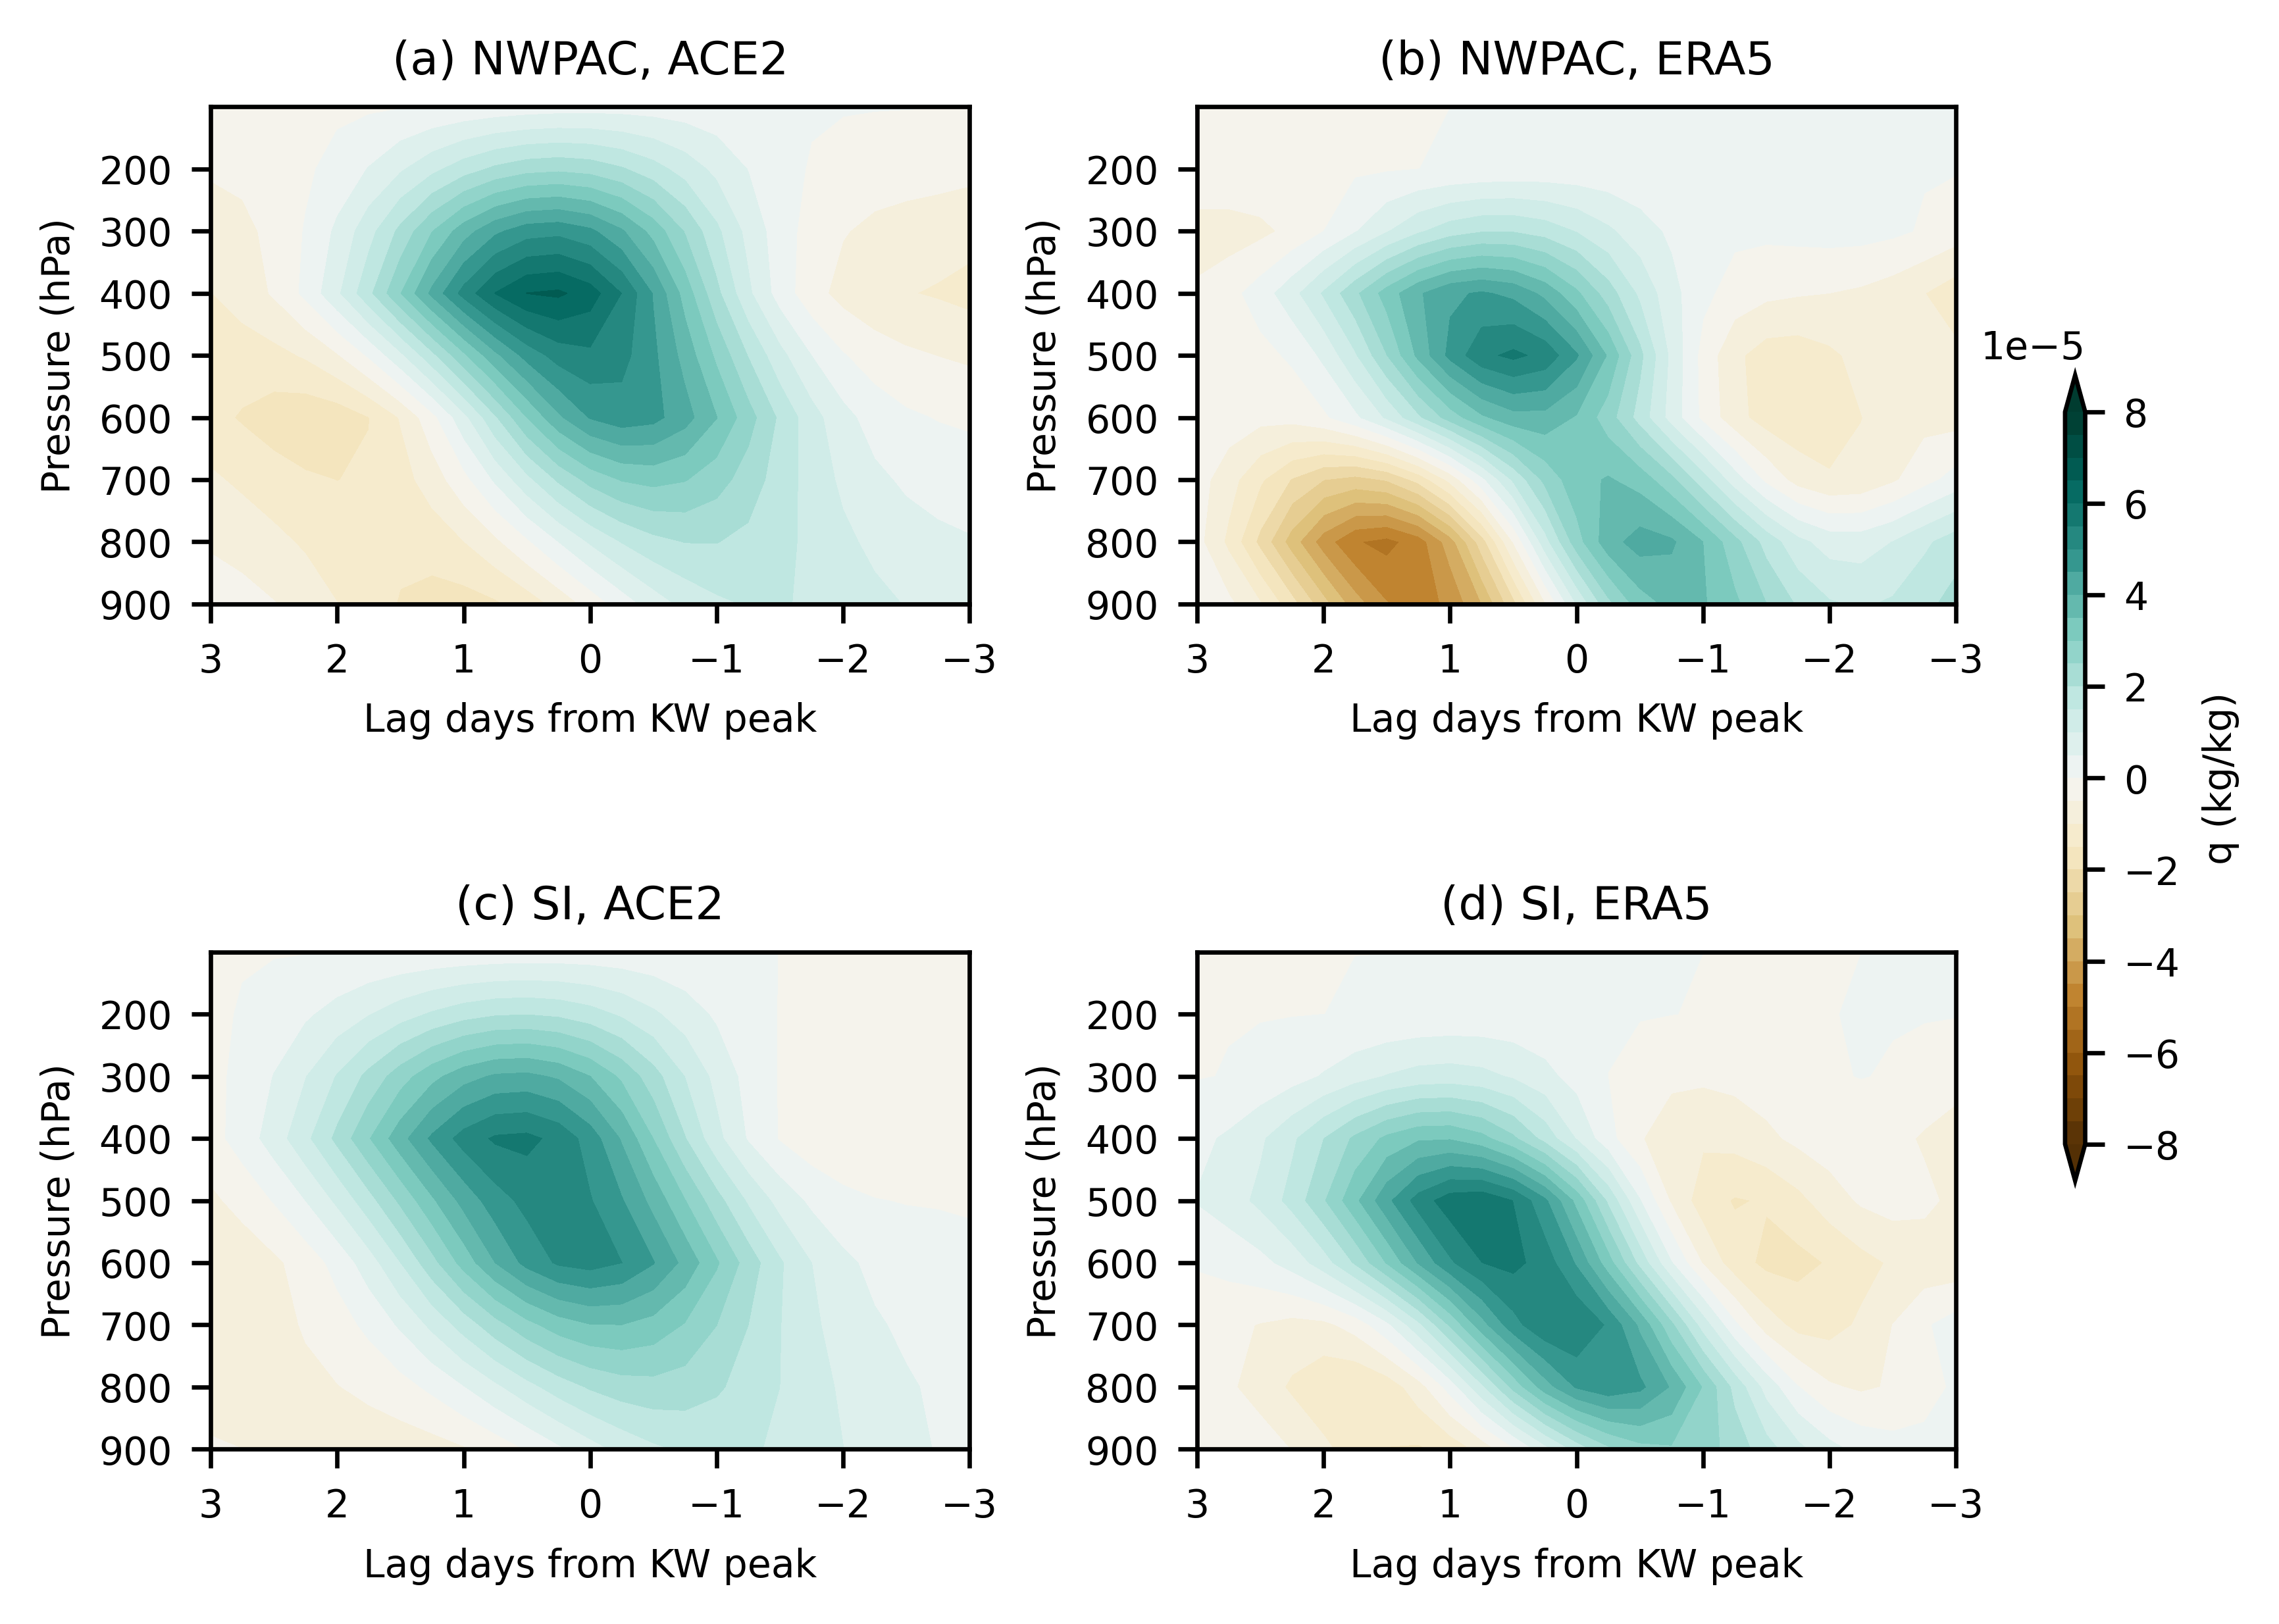

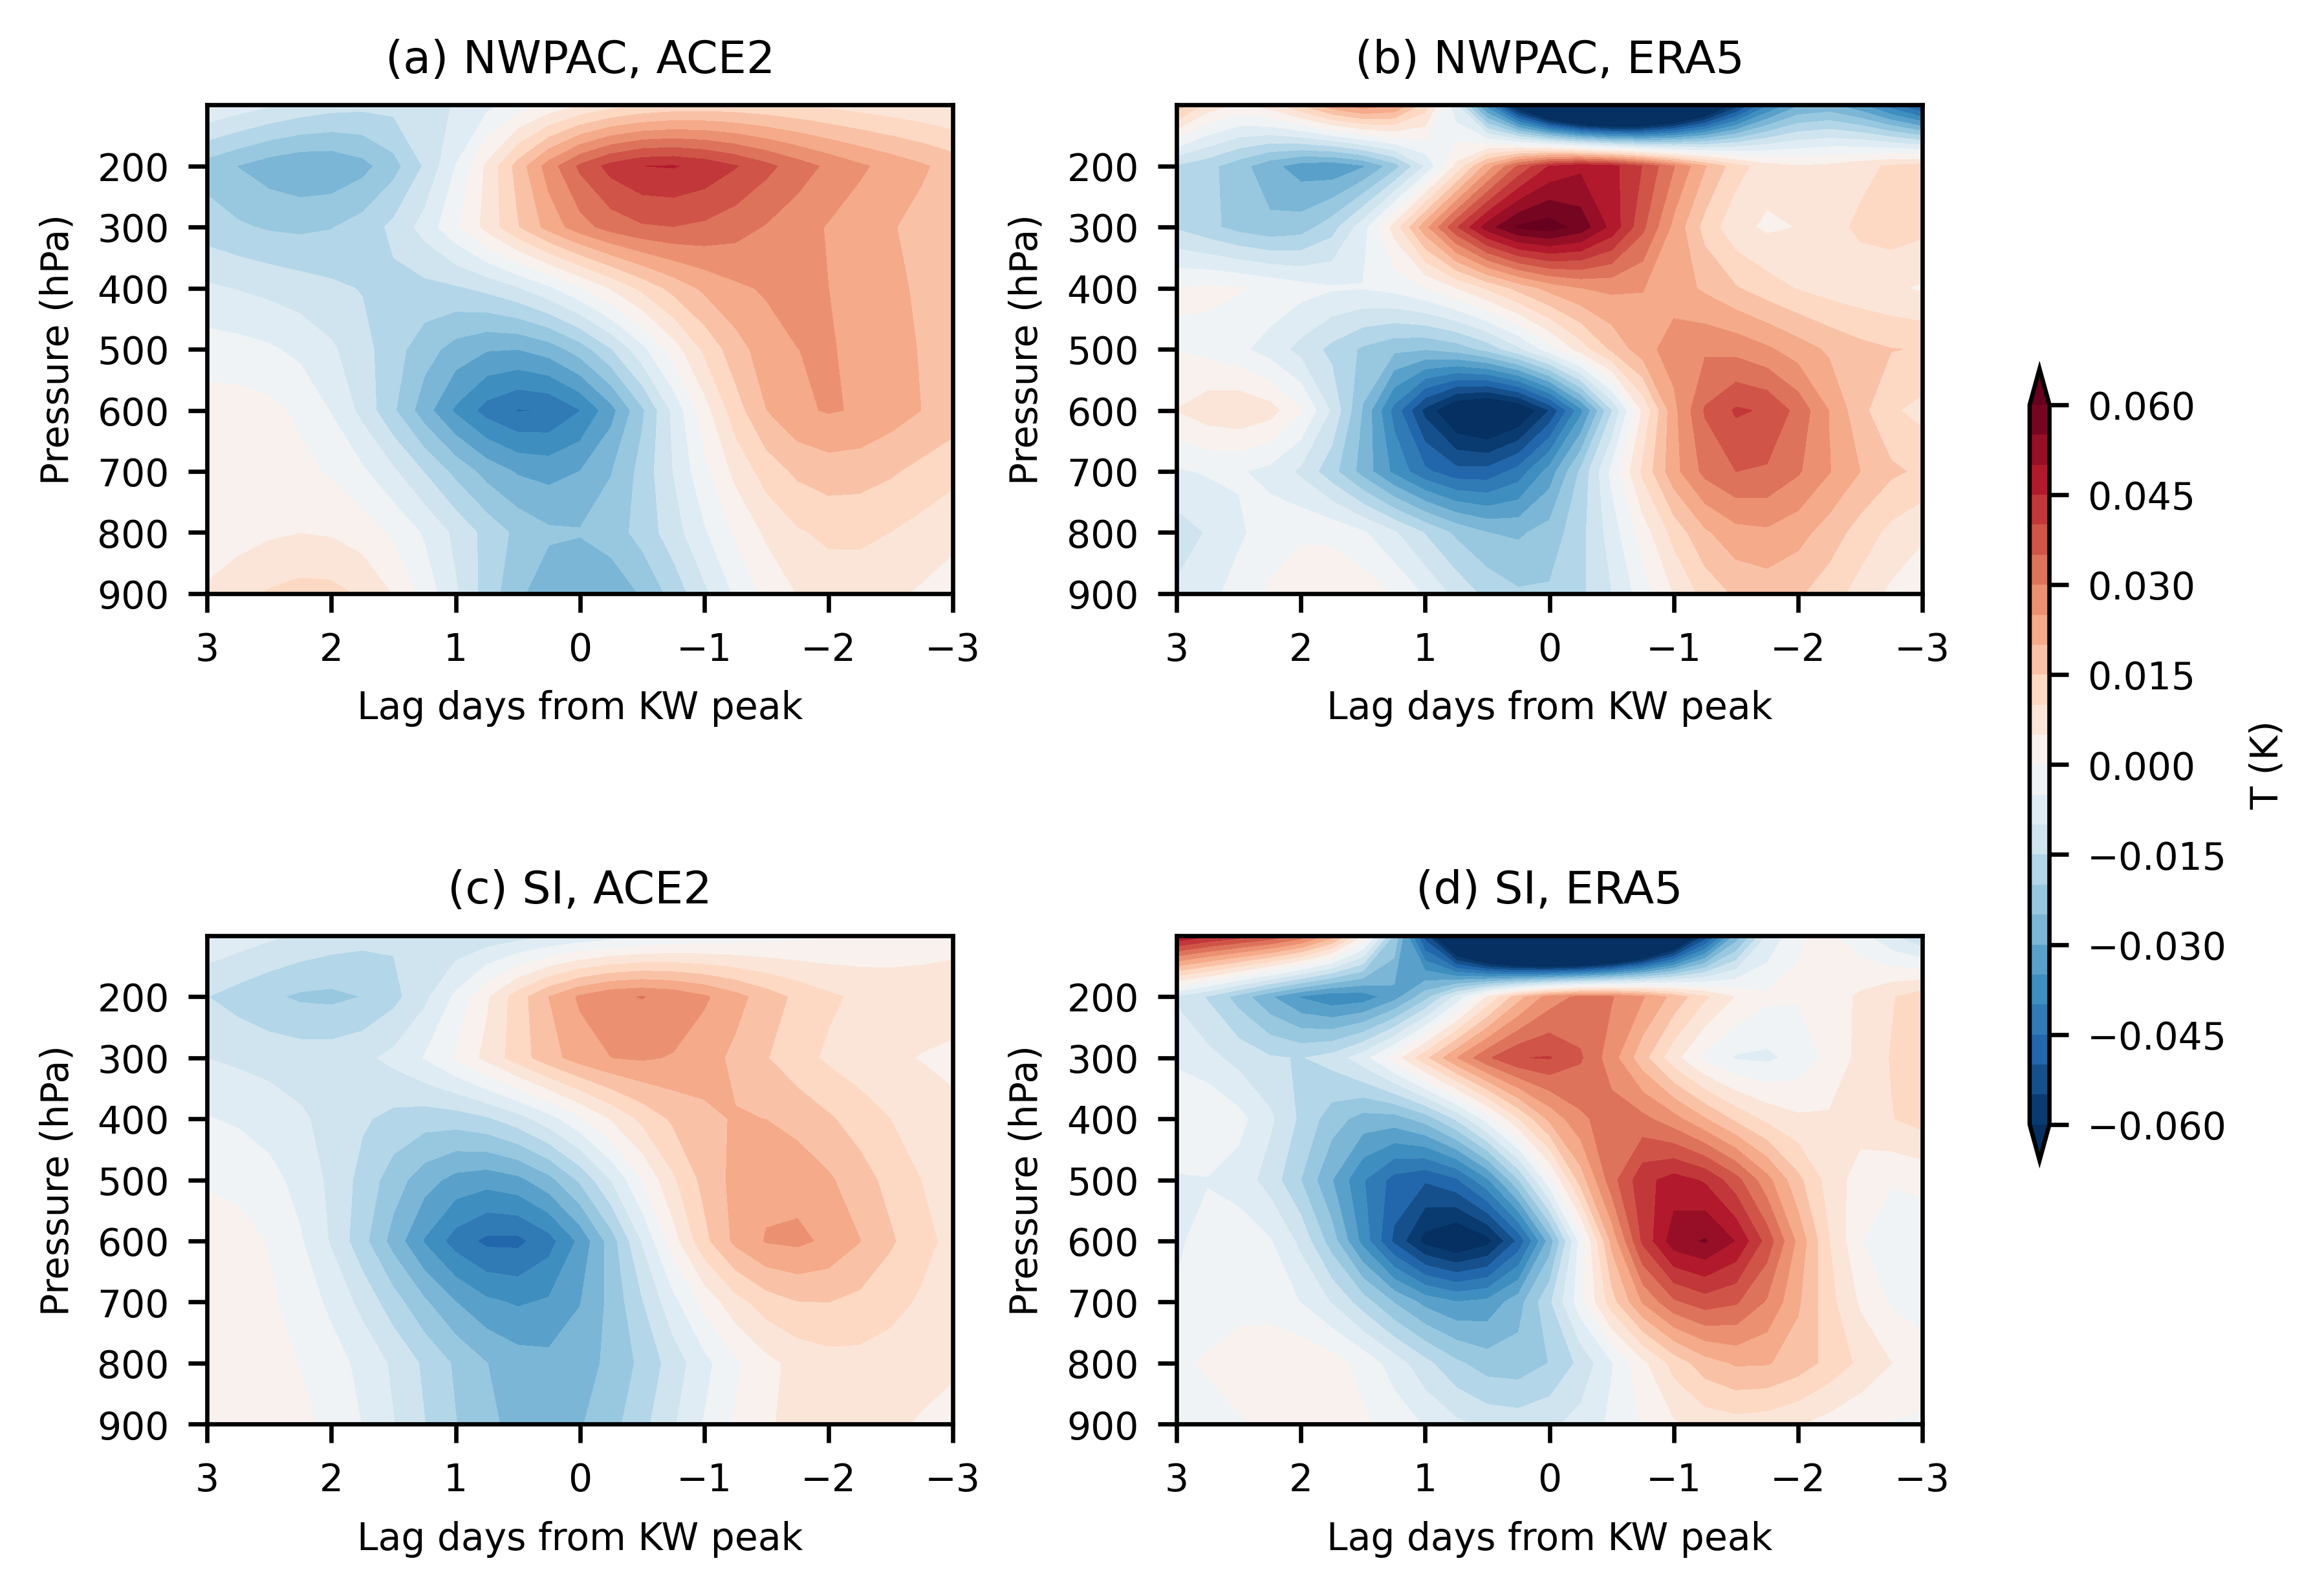

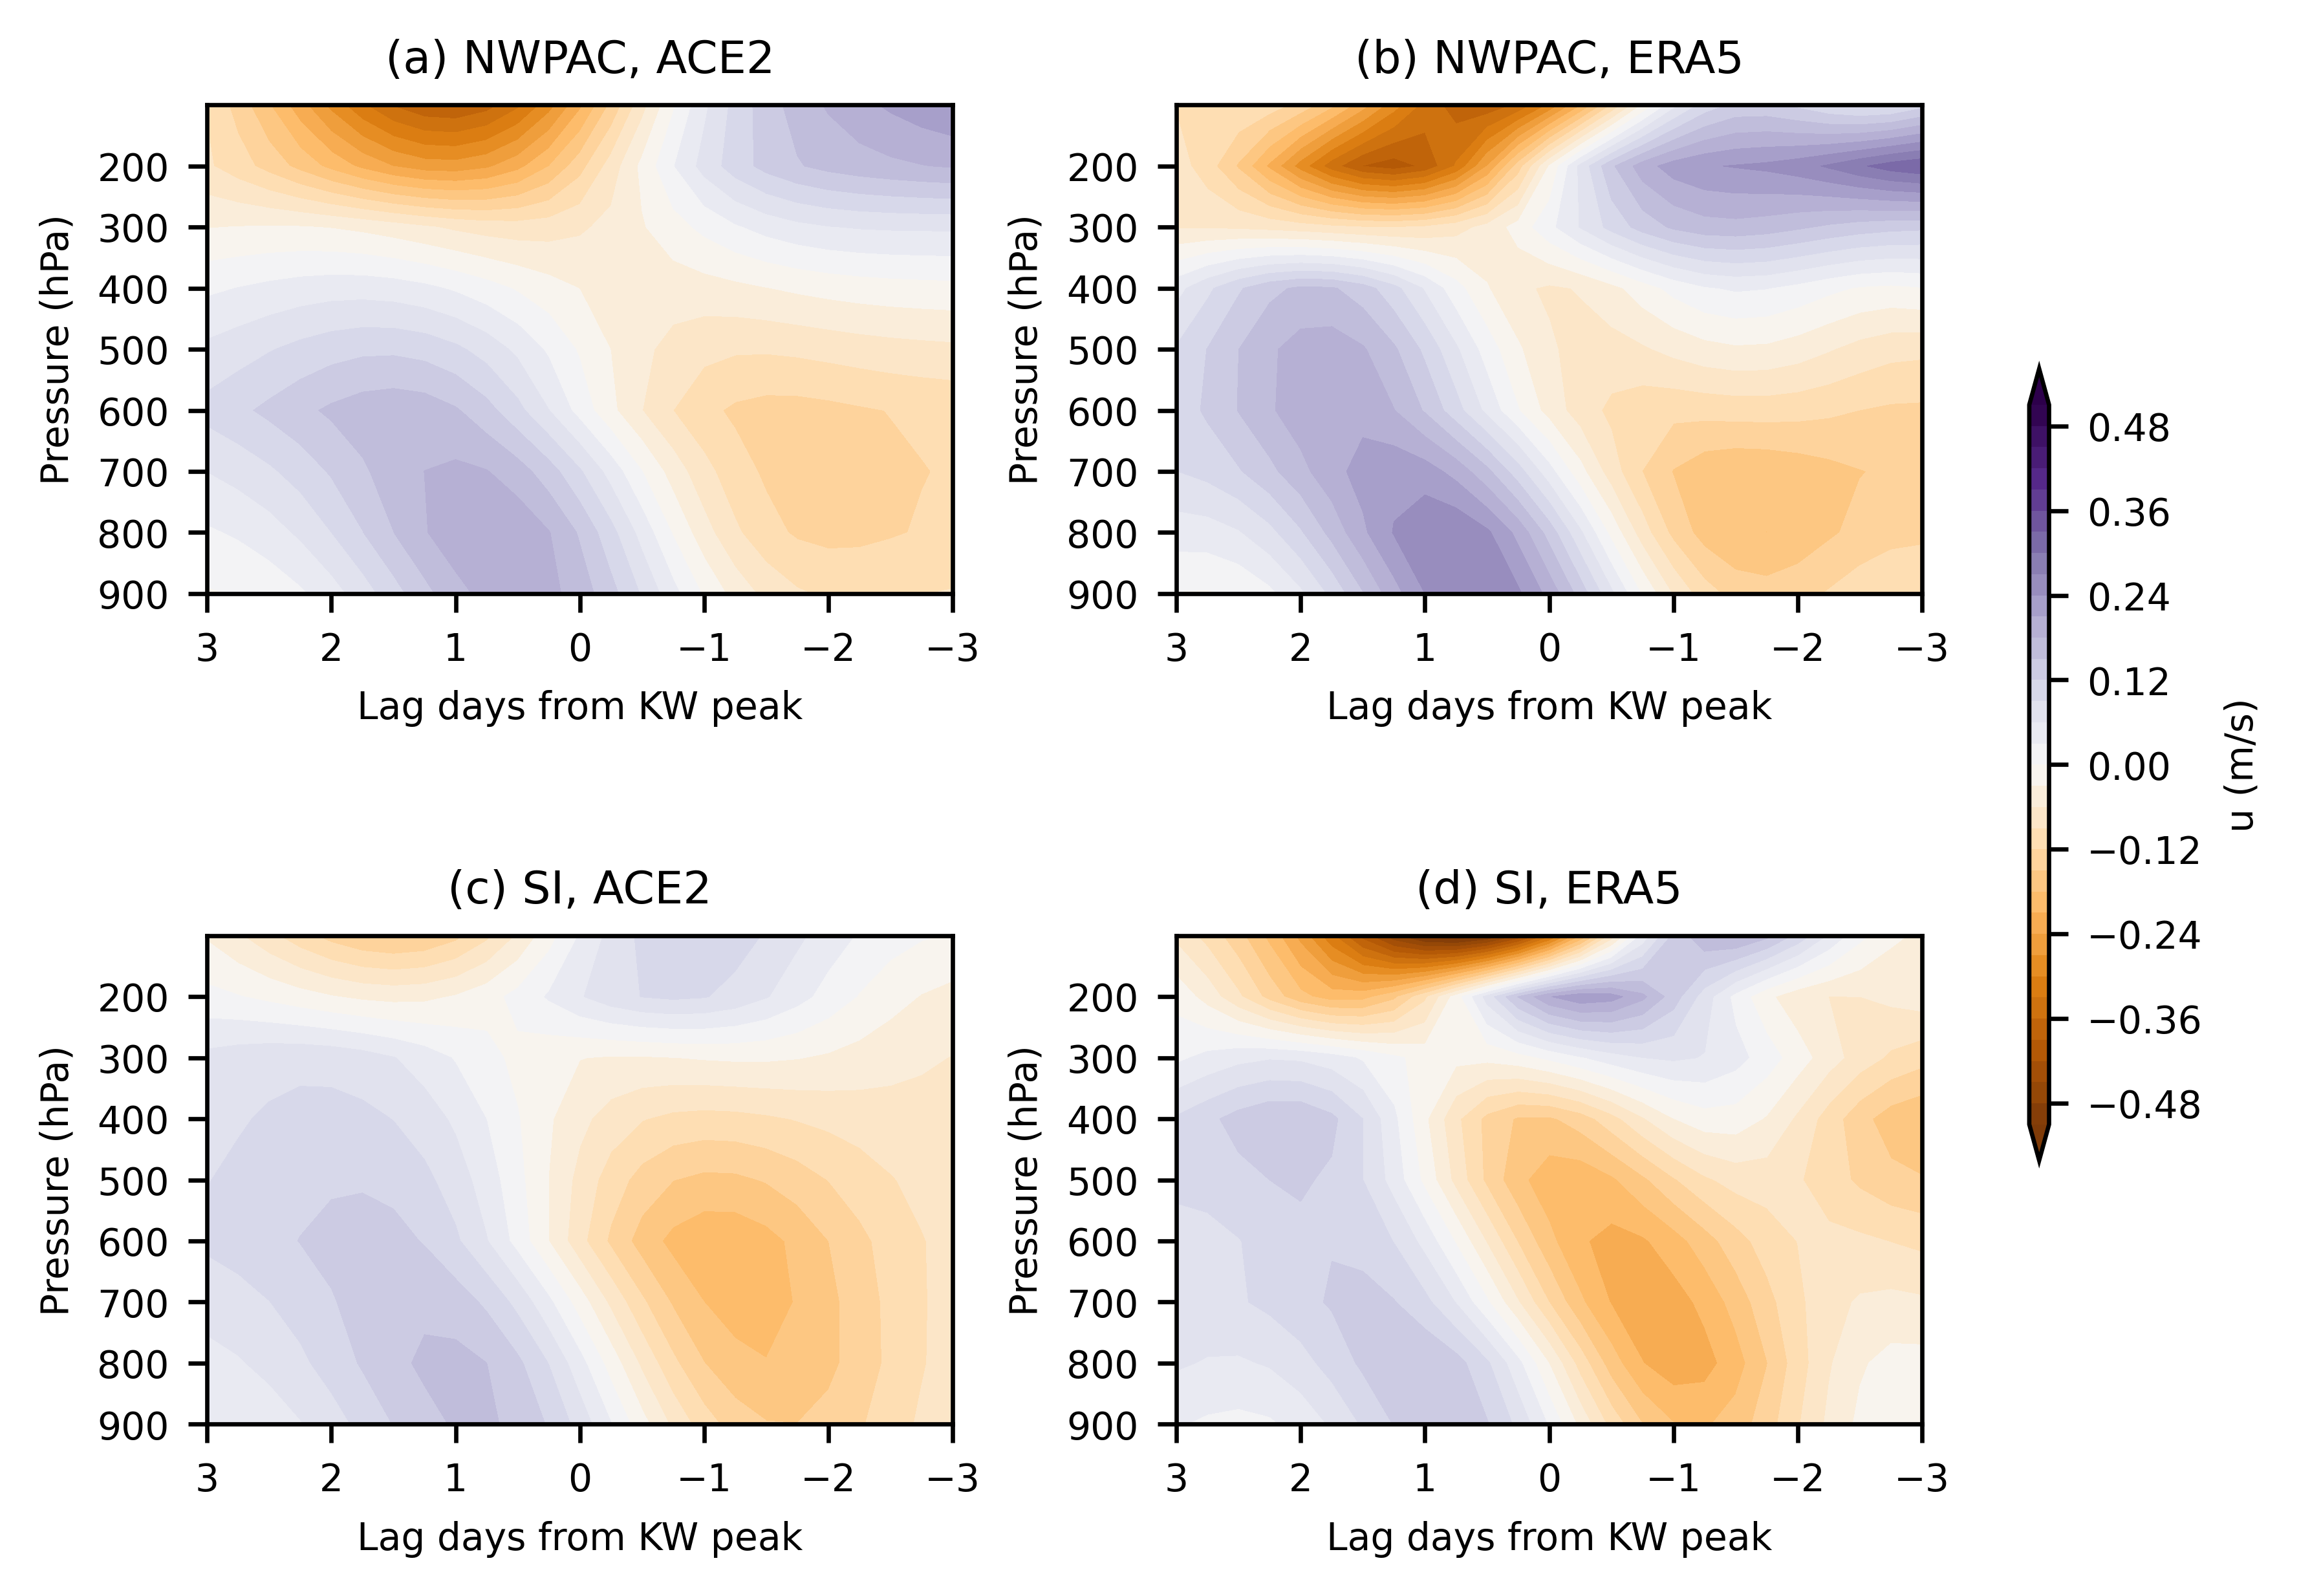

In [48]:
for iv in range(0, np.size(vname_list)):
    fig_name = 'Fig.S_KWcomposite_'+vname_list[iv]+'_vert_struct.png'
    fig, axes = plt.subplots(2,2,figsize=(6.5, 5),dpi=600)
    font = 7
    plt.rcParams.update({'font.size': font})
    plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.7)
    for iplt in range(0, 4):
        plt.subplot(2, 2, iplt+1)
        ax = plt.gca()

        V = globals()[vname_list[iv]+'_lag_kw_basin_'+exp_list[iplt]]
        #print(np.shape(V))

        if iv == 0:
            clev = np.arange(-8, 8.5, 0.5)*10**(-5)
        elif iv == 1:
            clev = np.arange(-0.06,0.065,0.005)
        elif iv == 2:
            clev = np.arange(-0.51,0.54,0.03)

        xx, yy = np.meshgrid(lags, plev)
        plt.contourf(xx, yy, V[:,:,ibasin_list[iplt]].T, levels=clev, cmap=cmap_list[iv], extend='both' )
        plt.title(label_list[iplt]+basin_list[ibasin_list[iplt]]+', '+exp_list_title[iplt])
        plt.yticks(np.arange(200,1000,100),fontsize=font)
        plt.gca().invert_yaxis()
        plt.xlim([-3, 3])
        plt.gca().invert_xaxis()
        plt.xlabel('Lag days from KW peak')
        plt.ylabel('Pressure (hPa)')

    cb = plt.colorbar(ax=axes[:,:],orientation = 'vertical',shrink=.6, aspect=40, pad=0.05)
    cb.set_label(vname_list[iv]+' ('+unit_list[iv]+')', fontsize=font)
    #cb.set_ticks(cticks)
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()

# Plot contribution of each factor to TCGI

In [98]:
# Load contribution from ERA5
data = np.load(file_dir_obs_ace2+'TCGI_each_term_contribution_era5_10yr.npz')
contribution_colrh_era5 = data['contribution_colrh']
contribution_absvor_era5 = data['contribution_absvor']
contribution_relsst_era5 = data['contribution_relsst']
contribution_shear_era5 = data['contribution_shear']

# Load contribution from ACE2
data = np.load(file_dir_ace2_100yr+'TCGI_each_term_contribution_ace2_100yr.npz')
contribution_colrh_ace2 = data['contribution_colrh']
contribution_absvor_ace2 = data['contribution_absvor']
contribution_relsst_ace2 = data['contribution_relsst']
contribution_shear_ace2 = data['contribution_shear']

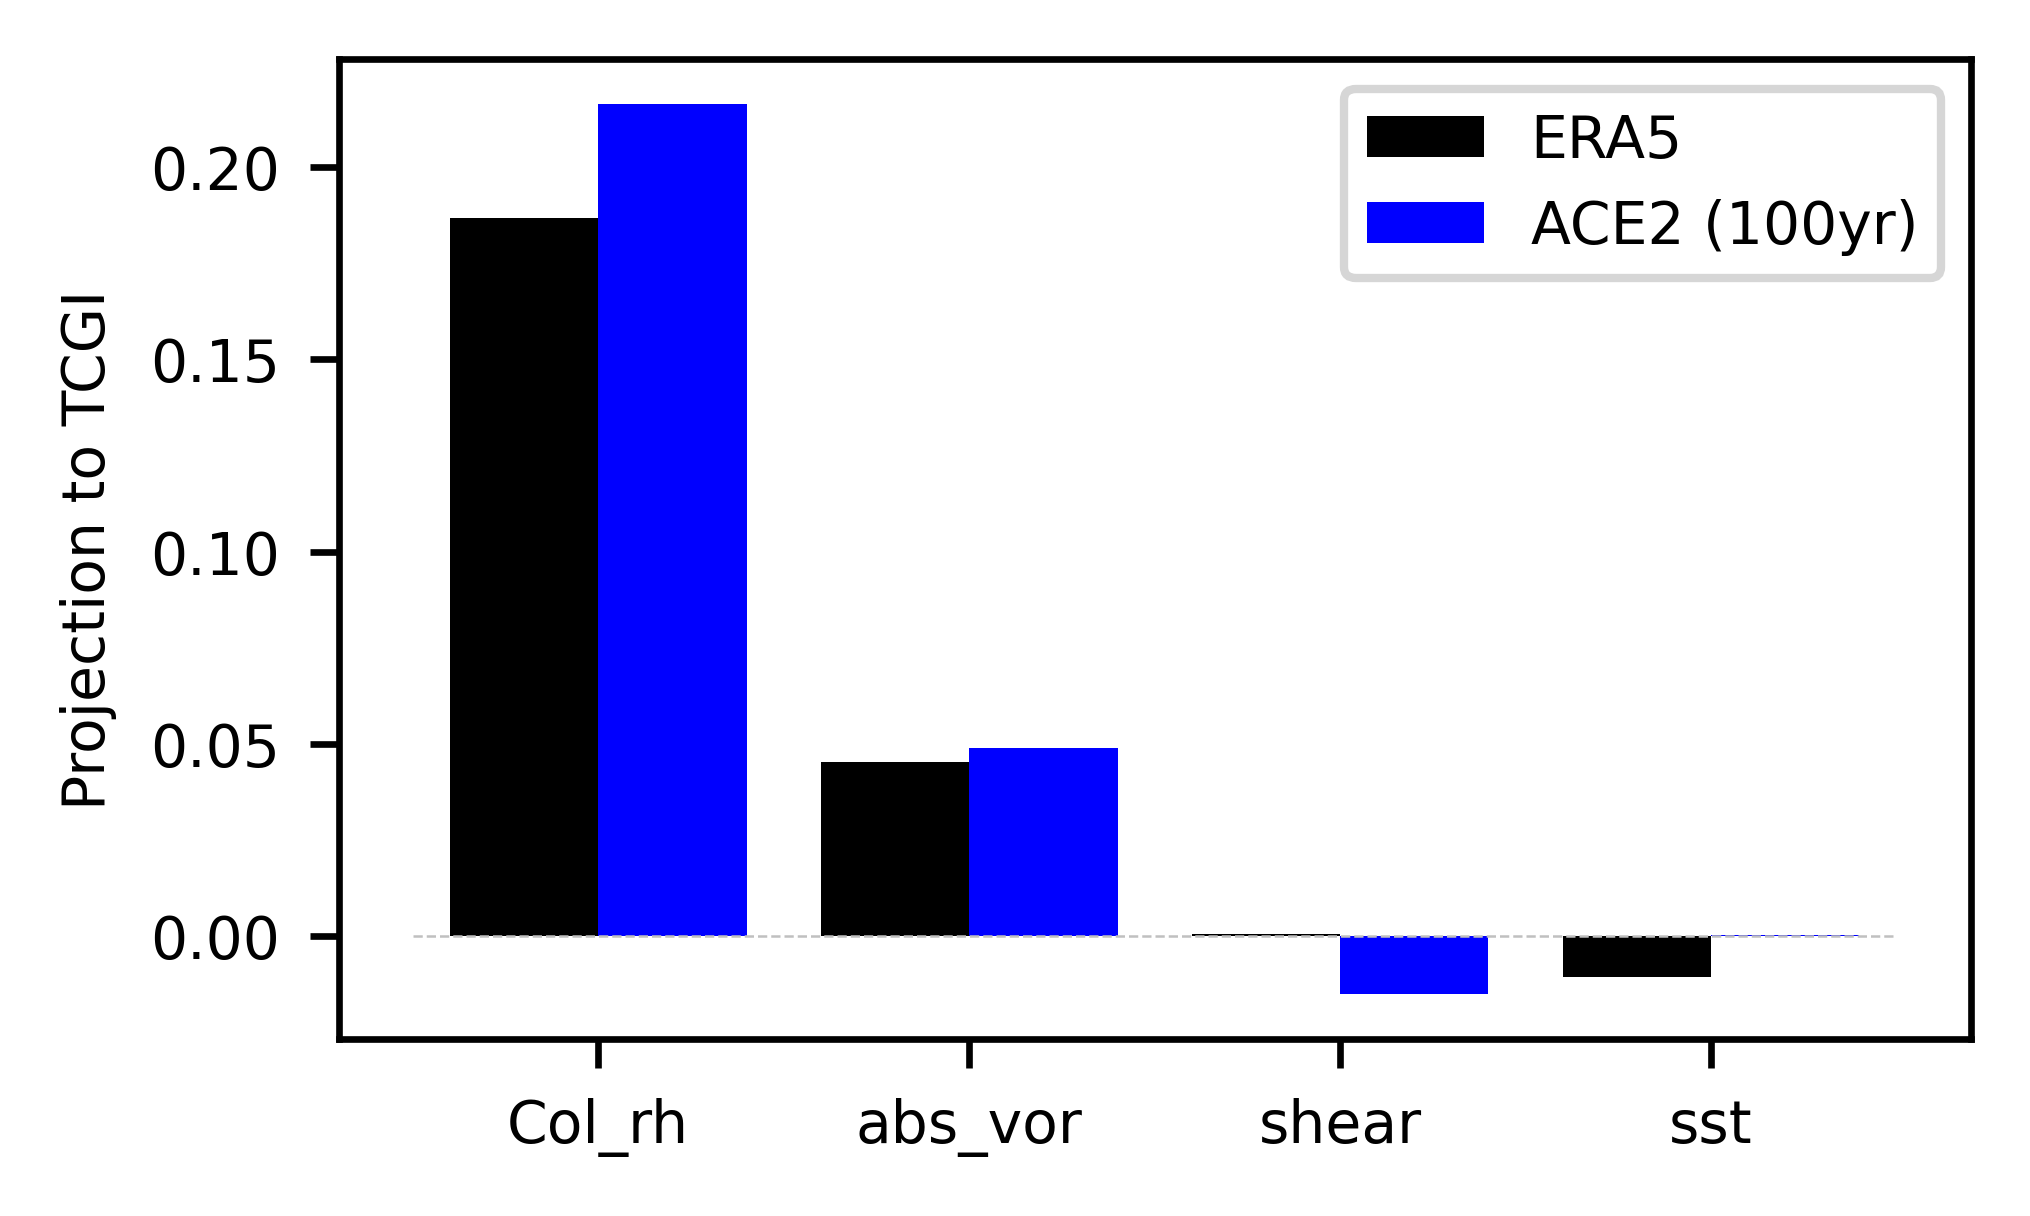

In [122]:
fig_name = 'Fig.S_TCGI_each_term_contribution.png'
fig, axes = plt.subplots(1,1,figsize=(3.2, 2.4),dpi=600)
font = 7
plt.rcParams.update({'font.size': font})
plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.7)

r_era5 = np.array([contribution_colrh_era5, contribution_absvor_era5, contribution_shear_era5, contribution_relsst_era5])
r_ace2 = np.array([contribution_colrh_ace2, contribution_absvor_ace2, contribution_shear_ace2, contribution_relsst_ace2])

dx = 0.4

x = np.arange(0, 4)
zero = np.zeros([5])
x2 = np.arange(-0.5, 4.5)

plt.bar(x-dx/2, r_era5, color='k', width=dx)
plt.bar(x+dx/2, r_ace2, color='b', width=dx)
plt.legend(['ERA5','ACE2 (100yr)'])
plt.plot(x2, zero, color='silver', linestyle='--', linewidth=0.3)
plt.xticks(x, ('Col_rh','abs_vor','shear','sst'))
plt.ylabel('Projection to TCGI')
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()